In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import ssl
import os

In [13]:
# ✅ Fix SSL certificate verification issue
ssl._create_default_https_context = ssl._create_unverified_context

In [14]:
# ✅ Updated data path (no train/val/test directories; direct class folders under 'Body Parts')
data_dir = 'Body Parts/Face'  # Example: 'Body Parts/Eye', 'Body Parts/Face', etc.


In [15]:
# Image dimensions and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32


In [16]:
# ✅ Data augmentation and data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # ✅ Split data into 80% train and 20% validation
)


In [17]:
# ✅ Generator function
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 273 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [18]:
# ✅ Debugging: Verify classes
print("Classes found:", train_generator.class_indices)
num_classes = train_generator.num_classes
print(f"Number of classes detected: {num_classes}")

Classes found: {'Clear Face': 0, 'Pallor': 1, 'Swollen gum': 2}
Number of classes detected: 3


In [19]:
# ✅ Build VGG16 model
def build_vgg16_model(num_classes):
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [20]:
# ✅ Callbacks to save the model
def get_callbacks(model_name):
    return [
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint(filepath=f'{model_name}_saved_model_Face', save_format='tf', monitor='val_loss', save_best_only=True)  # ✅ TensorFlow SavedModel format
    ]


In [21]:
# ✅ Training function
def train_model(model, model_name):
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=val_generator,
        callbacks=get_callbacks(model_name)
    )

    # ✅ Save final model in TensorFlow SavedModel format
    model_save_path = f'{model_name}_final_saved_model'
    model.save(model_save_path, save_format='tf')
    print(f"✅ Final model saved at: {model_save_path}")
    return history

In [22]:
# ✅ Build and train VGG16 model
print("Building and training VGG16 model...")
model = build_vgg16_model(num_classes)
history = train_model(model, 'BodyParts_VGG16')

Building and training VGG16 model...
Epoch 1/20
9/9 [==============================] - ETA: 0s - loss: 0.3681 - accuracy: 0.9121 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 135s 16s/step - loss: 0.3681 - accuracy: 0.9121 - val_loss: 0.2295 - val_accuracy: 0.9545
Epoch 2/20
9/9 [==============================] - ETA: 0s - loss: 0.2436 - accuracy: 0.9341 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 202s 23s/step - loss: 0.2436 - accuracy: 0.9341 - val_loss: 0.1067 - val_accuracy: 0.9545
Epoch 3/20
9/9 [==============================] - ETA: 0s - loss: 0.1301 - accuracy: 0.9597 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 209s 24s/step - loss: 0.1301 - accuracy: 0.9597 - val_loss: 0.0952 - val_accuracy: 0.9697
Epoch 4/20
9/9 [==============================] - ETA: 0s - loss: 0.1021 - accuracy: 0.9524 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 173s 20s/step - loss: 0.1021 - accuracy: 0.9524 - val_loss: 0.0585 - val_accuracy: 0.9697
Epoch 5/20
9/9 [==============================] - ETA: 0s - loss: 0.0654 - accuracy: 0.9707 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 138s 15s/step - loss: 0.0654 - accuracy: 0.9707 - val_loss: 0.0448 - val_accuracy: 0.9848
Epoch 6/20
9/9 [==============================] - ETA: 0s - loss: 0.0606 - accuracy: 0.9853 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 138s 16s/step - loss: 0.0606 - accuracy: 0.9853 - val_loss: 0.0408 - val_accuracy: 0.9848
Epoch 7/20
9/9 [==============================] - ETA: 0s - loss: 0.0518 - accuracy: 0.9780 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 133s 15s/step - loss: 0.0518 - accuracy: 0.9780 - val_loss: 0.0384 - val_accuracy: 1.0000
Epoch 8/20
9/9 [==============================] - ETA: 0s - loss: 0.0510 - accuracy: 0.9853 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 134s 15s/step - loss: 0.0510 - accuracy: 0.9853 - val_loss: 0.0324 - val_accuracy: 1.0000
Epoch 9/20
9/9 [==============================] - ETA: 0s - loss: 0.0408 - accuracy: 0.9744 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 135s 15s/step - loss: 0.0408 - accuracy: 0.9744 - val_loss: 0.0292 - val_accuracy: 0.9848
Epoch 10/20
9/9 [==============================] - 133s 15s/step - loss: 0.0407 - accuracy: 0.9890 - val_loss: 0.0398 - val_accuracy: 0.9848
Epoch 11/20
9/9 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9963 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 133s 15s/step - loss: 0.0258 - accuracy: 0.9963 - val_loss: 0.0245 - val_accuracy: 1.0000
Epoch 12/20
9/9 [==============================] - ETA: 0s - loss: 0.0403 - accuracy: 0.9853 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 136s 15s/step - loss: 0.0403 - accuracy: 0.9853 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 13/20
9/9 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.9927 INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 145s 16s/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0189 - val_accuracy: 0.9848
Epoch 14/20
9/9 [==============================] - 125s 14s/step - loss: 0.0216 - accuracy: 0.9963 - val_loss: 0.0192 - val_accuracy: 1.0000
Epoch 15/20
9/9 [==============================] - 92s 11s/step - loss: 0.0271 - accuracy: 0.9890 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 16/20
9/9 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 0.9927INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 96s 11s/step - loss: 0.0275 - accuracy: 0.9927 - val_loss: 0.0181 - val_accuracy: 1.0000
Epoch 17/20
9/9 [==============================] - ETA: 0s - loss: 0.0301 - accuracy: 0.9853INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 98s 11s/step - loss: 0.0301 - accuracy: 0.9853 - val_loss: 0.0168 - val_accuracy: 1.0000
Epoch 18/20
9/9 [==============================] - 95s 11s/step - loss: 0.0299 - accuracy: 0.9927 - val_loss: 0.0245 - val_accuracy: 0.9848
Epoch 19/20
9/9 [==============================] - 88s 10s/step - loss: 0.0195 - accuracy: 0.9963 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 20/20
9/9 [==============================] - ETA: 0s - loss: 0.0153 - accuracy: 0.9963INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_saved_model_Face/assets


9/9 [==============================] - 92s 10s/step - loss: 0.0153 - accuracy: 0.9963 - val_loss: 0.0128 - val_accuracy: 1.0000
INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


INFO:tensorflow:Assets written to: BodyParts_VGG16_final_saved_model/assets


✅ Final model saved at: BodyParts_VGG16_final_saved_model


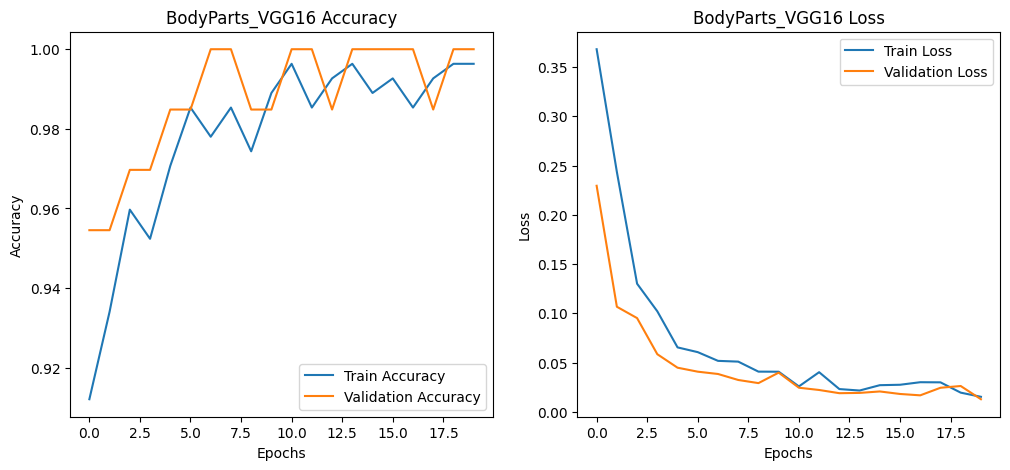

In [23]:
# ✅ Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, 'BodyParts_VGG16')


In [24]:
# Save final models in TensorFlow SavedModel format
model.save('Face_model')  

INFO:tensorflow:Assets written to: Face_model/assets


INFO:tensorflow:Assets written to: Face_model/assets
